<a href="https://colab.research.google.com/github/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/blob/main/Mini_Food_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2025-09-28 07:51:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip.2’

101_food_classes_10 100%[===================>]   1.51G   149MB/s    in 16s     

2025-09-28 07:52:10 (99.5 MB/s) - ‘101_food_classes_10_percent.zip.2’ saved [1625420029/1625420029]



In [85]:
!wget https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py

--2025-09-28 07:52:10--  https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6733 (6.6K) [text/plain]
Saving to: ‘helper_functions.py.2’

helper_functions.py 100%[===================>]   6.58K  --.-KB/s    in 0s      

2025-09-28 07:52:10 (101 MB/s) - ‘helper_functions.py.2’ saved [6733/6733]



In [86]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,compare_historys,walk_through_dir,unzip_data

In [87]:
unzip_data('101_food_classes_10_percent.zip')

In [88]:
walk_through_dir('101_food_classes_10_percent')

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/spaghetti_carbonara'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/breakfast_burrito'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/french_fries'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/club_sandwich'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/chocolate_cake'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/ravioli'.
There are 0 directories and 75 images 

In [89]:
train_dir='101_food_classes_10_percent/train'
test_dir='101_food_classes_10_percent/test'

In [90]:
import tensorflow as tf

In [91]:
IMG_SIZE=(224,224)

In [92]:
train_all_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir,label_mode='categorical',image_size=IMG_SIZE)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode='categorical',image_size=IMG_SIZE,shuffle=False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


Create a model checkpoint callback

In [93]:
chechpoint_path='101_food_all_data_10%_checkpoint.weights.h5'
check_point_callback=tf.keras.callbacks.ModelCheckpoint(chechpoint_path,save_weights_only=True,monitor='val_accuracy',save_best_only=True)

# **Create Data Augmentation Layer**

In [94]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import preprocessing

In [95]:
data_augmentation=Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomRotation(0.2),
    # layers.Rescaling(1/255.)
],name='data_augmentation_layer')

In [96]:
# Setup base model
base_model=tf.keras.applications.EfficientNetB0(include_top=False,weights='imagenet')
base_model.trainable=False

In [97]:
# Setup model architecture with trainable top layer
inputs=layers.Input(shape=(224,224,3),name='input_layer')
x=data_augmentation(inputs)
x=base_model(x,training=False)
x=layers.GlobalAveragePooling2D(name='Global_Average_pooling_layer')(x)
outputs=layers.Dense(len(train_all_10_percent.class_names),activation='softmax',name='Output_layer')(x)

model=tf.keras.Model(inputs,outputs)
model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation_layer         │ (None, None, None, 3)  │             0 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, None, None,     │     4,049,571 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Global_Average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 101)            │       129,381 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [98]:
# Compile and fit
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

Model Training

In [99]:
history_all_classes_10_percent=model.fit(train_all_10_percent,epochs=5,validation_data=test_data,validation_steps=int(0.15*len(test_data)),callbacks=[check_point_callback])

Epoch 1/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 51s 171ms/step - accuracy: 0.1795 - loss: 3.8885 - val_accuracy: 0.4928 - val_loss: 2.3989
Epoch 2/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 33s 138ms/step - accuracy: 0.5092 - loss: 2.2194 - val_accuracy: 0.5358 - val_loss: 1.9701
Epoch 3/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 34s 145ms/step - accuracy: 0.5784 - loss: 1.7935 - val_accuracy: 0.5493 - val_loss: 1.8096
Epoch 4/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 32s 136ms/step - accuracy: 0.6083 - loss: 1.5898 - val_accuracy: 0.5514 - val_loss: 1.7363
Epoch 5/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 33s 141ms/step - accuracy: 0.6501 - loss: 1.4286 - val_accuracy: 0.5633 - val_loss: 1.6725


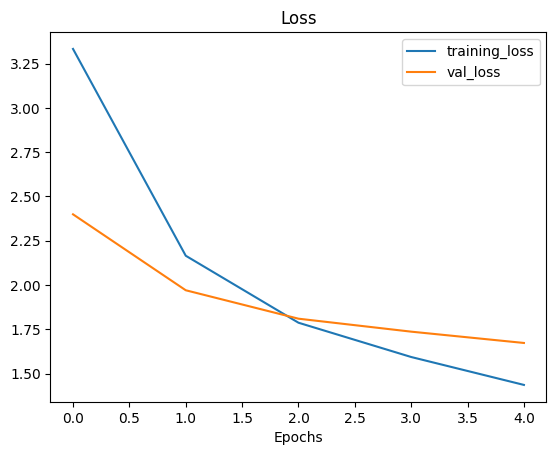

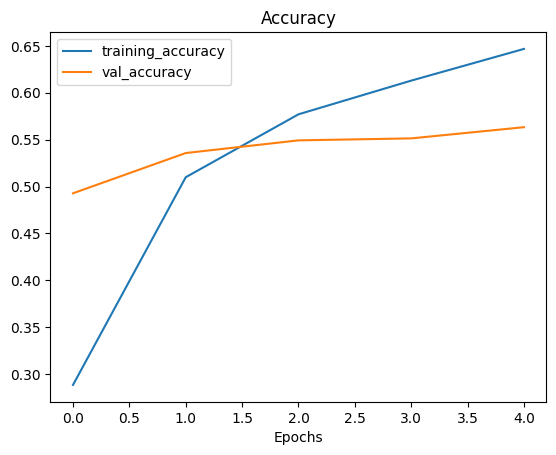

In [100]:
plot_loss_curves(history_all_classes_10_percent)

In [101]:
# Unfreeze some layers for fine tunning the
base_model.trainable=True

for layer  in base_model.layers[:-5]:
  layer.trainable=False

In [102]:
# Check which layer in model are trainable
for layer_no ,layer in enumerate(model.layers[2].layers):
  print(layer_no,layer.name,layer.trainable)

0 input_layer_4 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [103]:
for layer in model.layers:
  print(layer.name,layer.trainable)

input_layer True
data_augmentation_layer True
efficientnetb0 True
Global_Average_pooling_layer True
Output_layer True


In [104]:
# Recompile the model

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
# Model Training
fine_tune_epochs=10

history_all_classes_10_percent_fine_tuned=model.fit(train_all_10_percent,
                                                    epochs=fine_tune_epochs,
                                                    initial_epoch=history_all_classes_10_percent.epoch[-1],
                                                    validation_data=test_data,
                                                    validation_steps=int(0.15*len(test_data)))

Epoch 5/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 46s 150ms/step - accuracy: 0.6181 - loss: 1.4881 - val_accuracy: 0.5363 - val_loss: 1.7905
Epoch 6/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 32s 135ms/step - accuracy: 0.7197 - loss: 1.0532 - val_accuracy: 0.5561 - val_loss: 1.7388
Epoch 7/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 33s 138ms/step - accuracy: 0.7705 - loss: 0.8492 - val_accuracy: 0.5572 - val_loss: 1.7737
Epoch 8/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 41s 173ms/step - accuracy: 0.8097 - loss: 0.6938 - val_accuracy: 0.5707 - val_loss: 1.6708
Epoch 9/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 41s 173ms/step - accuracy: 0.8484 - loss: 0.5987 - val_accuracy: 0.5739 - val_loss: 1.7186
Epoch 10/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 41s 173ms/step - accuracy: 0.8731 - loss: 0.4932 - val_accuracy: 0.5625 - val_loss: 1.7787


In [105]:
all_classes_10_percent_fine_tune_result=model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.5827 - loss: 1.6846


Compare Histories

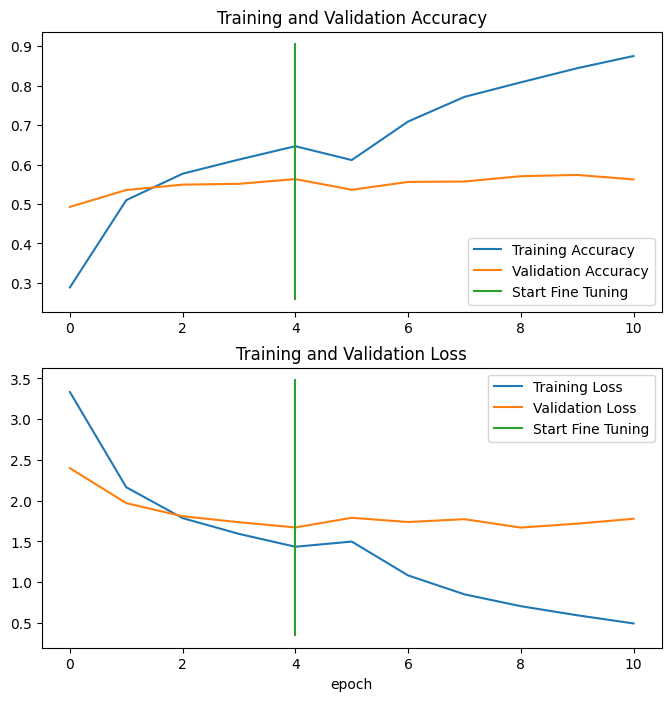

In [106]:
from types import new_class
compare_historys(original_history=history_all_classes_10_percent,new_history=history_all_classes_10_percent_fine_tuned,initial_epochs=5)

Save and Load Model

In [107]:
model_paths="/content/drive/MyDrive/deep_learning_models"
model.save(filepath=model_paths+"/"+"fine_tuned_model_all_data_10_percent.h5")

In [108]:
# Define the custom objects dictionary
custom_objects = {"RandomHeight": tf.keras.layers.RandomHeight,
                  "RandomWidth": tf.keras.layers.RandomWidth,
                  "RandomRotation": tf.keras.layers.RandomRotation,
                  "RandomFlip": tf.keras.layers.RandomFlip}

# Load the model with custom objects
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/deep_learning_models/fine_tuned_model_all_data_10_percent.h5",
                                        custom_objects=custom_objects)

loaded_model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation_layer         │ (None, None, None, 3)  │             0 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, None, None,     │     4,049,571 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Global_Average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 101)            │       129,381 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,178,954 (15.94 MB)

 Trainable params: 910,821 (3.47 MB)

 Non-trainable params: 3,268,131 (12.47 MB)

 Optimizer params: 2 (12.00 B)

In [109]:
loaded_model_results=loaded_model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 64s 75ms/step - accuracy: 0.4891 - loss: 2.1589


Evaluating model performance accross differnt classes

In [110]:
import tensorflow as tf

In [111]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip

--2025-09-28 08:02:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13192985 (13M) [application/zip]
Saving to: ‘custom_food_images.zip.2’

custom_food_images. 100%[===================>]  12.58M  --.-KB/s    in 0.1s    

2025-09-28 08:02:03 (87.1 MB/s) - ‘custom_food_images.zip.2’ saved [13192985/13192985]



Making predictions with our trained_model

In [112]:
pred_probs=model.predict(test_data,verbose=1)

790/790 ━━━━━━━━━━━━━━━━━━━━ 63s 78ms/step


In [113]:
pred_probs

array([[6.2366968e-01, 4.7810358e-06, 8.9606486e-04, ..., 1.8284715e-06,
        8.3836523e-04, 2.2995178e-02],
       [8.4288353e-01, 2.1448290e-08, 2.6112222e-04, ..., 9.1666577e-04,
        1.7123413e-07, 7.0726873e-07],
       [1.6563073e-01, 7.5467476e-03, 8.9884404e-04, ..., 1.9935603e-04,
        9.8198385e-04, 1.2156704e-03],
       ...,
       [3.6030956e-06, 6.4394727e-02, 6.8997679e-08, ..., 5.6757657e-05,
        4.2016615e-04, 2.6625615e-01],
       [1.4009958e-02, 3.0490955e-02, 1.5570530e-04, ..., 1.3388088e-05,
        1.0706472e-04, 2.8393960e-01],
       [8.1648035e-03, 2.0914031e-03, 3.8017657e-05, ..., 5.4840394e-04,
        4.8924668e-04, 8.4823567e-01]], dtype=float32)

In [114]:
len(pred_probs)

25250

In [115]:
pred_probs.shape

(25250, 101)

In [116]:
pred_probs[0]

array([6.2366968e-01, 4.7810358e-06, 8.9606486e-04, 2.1337524e-08,
       2.5454355e-07, 9.3976075e-07, 2.6095269e-05, 4.6827751e-08,
       2.0414200e-03, 1.0846789e-05, 7.1053796e-07, 4.6205569e-05,
       4.3846921e-05, 5.2134749e-07, 2.0182146e-04, 6.0900918e-04,
       1.7613735e-07, 6.5181237e-05, 2.7416291e-02, 1.2112776e-05,
       2.5120669e-04, 5.5557225e-06, 1.6840831e-04, 7.1100367e-05,
       1.5381271e-03, 1.6111601e-04, 2.3475788e-05, 1.8680046e-05,
       1.3596596e-02, 5.2320282e-04, 7.7591430e-08, 1.3338211e-04,
       2.5021064e-04, 3.6985926e-07, 1.9292205e-03, 1.7847341e-06,
       1.4806898e-05, 3.7307880e-05, 5.4141041e-04, 4.3479115e-05,
       3.7972884e-05, 7.3208747e-04, 8.1980088e-06, 7.8849034e-06,
       1.0339656e-04, 1.1037226e-05, 1.2626487e-04, 8.4084813e-06,
       2.3670664e-06, 7.7096038e-02, 1.6879138e-05, 1.5169488e-05,
       1.5847835e-01, 3.3581047e-03, 6.1821479e-06, 8.2737522e-04,
       4.9146847e-04, 8.7464461e-05, 2.4028916e-03, 9.0184511e

In [116]:
len(pred_probs[0])

In [117]:
sum(pred_probs[0])

np.float32(0.9999999)

In [118]:
tf.argmax(pred_probs[0])

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [119]:
test_data.class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [123]:
test_data.class_names[52]

'gyoza'

In [124]:
# Get predicted classes of each label
pred_classes=pred_probs.argmax(axis=1)
pred_classes[:10]

array([ 0,  0,  8,  8,  8, 78, 29, 46,  0,  0])